Import Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load Datasets

In [25]:
historical_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

Data Preprocessing - Clean and Merge Data

In [26]:
historical_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [27]:
historical_df.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12


In [28]:
historical_df1 = historical_df[~historical_df["Coin"].astype(str).str.startswith("@")]

In [29]:
historical_df1.shape

(177238, 16)

In [30]:
historical_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177238 entries, 64 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           177238 non-null  object 
 1   Coin              177238 non-null  object 
 2   Execution Price   177238 non-null  float64
 3   Size Tokens       177238 non-null  float64
 4   Size USD          177238 non-null  float64
 5   Side              177238 non-null  object 
 6   Timestamp IST     177238 non-null  object 
 7   Start Position    177238 non-null  float64
 8   Direction         177238 non-null  object 
 9   Closed PnL        177238 non-null  float64
 10  Transaction Hash  177238 non-null  object 
 11  Order ID          177238 non-null  int64  
 12  Crossed           177238 non-null  bool   
 13  Fee               177238 non-null  float64
 14  Trade ID          177238 non-null  float64
 15  Timestamp         177238 non-null  float64
dtypes: bool(1), float64(8), 

In [31]:
historical_df2 = historical_df1.dropna()


In [32]:
historical_df2.shape


(177238, 16)

In [33]:
historical_df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
64,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.03,7.47,1755.67,BUY,03-12-2024 14:42,0.00,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,0.614485,7.750000e+14,1.730000e+12
65,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.04,9.02,2120.06,BUY,03-12-2024 14:42,7.47,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,0.742021,5.420000e+14,1.730000e+12
66,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.04,7.72,1814.51,BUY,03-12-2024 14:42,16.49,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,0.635078,6.300000e+14,1.730000e+12
67,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.09,3.66,860.43,BUY,03-12-2024 14:42,24.21,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,0.301150,8.490000e+14,1.730000e+12
68,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.09,15.45,3632.14,BUY,03-12-2024 14:42,27.87,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,1.271249,7.960000e+14,1.730000e+12


In [34]:
historical_df2.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12


In [35]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [36]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [37]:
sentiment_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [38]:
# Trades: 'Timestamp IST' is in 'DD-MM-YYYY HH:MM'
historical_df2['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], format="%d-%m-%Y %H:%M")

In [39]:
historical_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177238 entries, 64 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           177238 non-null  object        
 1   Coin              177238 non-null  object        
 2   Execution Price   177238 non-null  float64       
 3   Size Tokens       177238 non-null  float64       
 4   Size USD          177238 non-null  float64       
 5   Side              177238 non-null  object        
 6   Timestamp IST     177238 non-null  datetime64[ns]
 7   Start Position    177238 non-null  float64       
 8   Direction         177238 non-null  object        
 9   Closed PnL        177238 non-null  float64       
 10  Transaction Hash  177238 non-null  object        
 11  Order ID          177238 non-null  int64         
 12  Crossed           177238 non-null  bool          
 13  Fee               177238 non-null  float64       
 14  Trade ID

In [40]:
historical_df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
64,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.03,7.47,1755.67,BUY,2024-12-03 14:42:00,0.00,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,0.614485,7.750000e+14,1.730000e+12
65,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.04,9.02,2120.06,BUY,2024-12-03 14:42:00,7.47,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,0.742021,5.420000e+14,1.730000e+12
66,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.04,7.72,1814.51,BUY,2024-12-03 14:42:00,16.49,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,0.635078,6.300000e+14,1.730000e+12
67,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.09,3.66,860.43,BUY,2024-12-03 14:42:00,24.21,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,0.301150,8.490000e+14,1.730000e+12
68,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.09,15.45,3632.14,BUY,2024-12-03 14:42:00,27.87,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,1.271249,7.960000e+14,1.730000e+12


In [41]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [42]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [43]:
historical_df2['date'] = historical_df2['Timestamp IST'].dt.date
sentiment_df['date'] = sentiment_df['date'].dt.date

In [44]:
df_merged = pd.merge(
    historical_df2,
    sentiment_df[['date', 'classification','value']],
    on='date',
    how='left'
)

In [45]:
df_merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.03,7.47,1755.67,BUY,2024-12-03 14:42:00,0.00,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,0.614485,7.750000e+14,1.730000e+12,2024-12-03,Extreme Greed,76.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.04,9.02,2120.06,BUY,2024-12-03 14:42:00,7.47,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,0.742021,5.420000e+14,1.730000e+12,2024-12-03,Extreme Greed,76.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.04,7.72,1814.51,BUY,2024-12-03 14:42:00,16.49,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,0.635078,6.300000e+14,1.730000e+12,2024-12-03,Extreme Greed,76.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.09,3.66,860.43,BUY,2024-12-03 14:42:00,24.21,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,0.301150,8.490000e+14,1.730000e+12,2024-12-03,Extreme Greed,76.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,235.09,15.45,3632.14,BUY,2024-12-03 14:42:00,27.87,Open Long,0.0,0xc35da30116f8a8e1833a04184ee1920201d600c7304c...,52201279961,True,1.271249,7.960000e+14,1.730000e+12,2024-12-03,Extreme Greed,76.0


In [46]:
df_merged.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
177233,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,2025-04-25 15:35:00,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,Greed,60.0
177234,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,2025-04-25 15:35:00,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,Greed,60.0
177235,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,2025-04-25 15:35:00,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,Greed,60.0
177236,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,2025-04-25 15:35:00,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,Greed,60.0
177237,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,2025-04-25 15:35:00,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12,2025-04-25,Greed,60.0


In [47]:
df_merged.to_csv("merged_data.csv", index=False)

In [48]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177238 entries, 0 to 177237
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           177238 non-null  object        
 1   Coin              177238 non-null  object        
 2   Execution Price   177238 non-null  float64       
 3   Size Tokens       177238 non-null  float64       
 4   Size USD          177238 non-null  float64       
 5   Side              177238 non-null  object        
 6   Timestamp IST     177238 non-null  datetime64[ns]
 7   Start Position    177238 non-null  float64       
 8   Direction         177238 non-null  object        
 9   Closed PnL        177238 non-null  float64       
 10  Transaction Hash  177238 non-null  object        
 11  Order ID          177238 non-null  int64         
 12  Crossed           177238 non-null  bool          
 13  Fee               177238 non-null  float64       
 14  Trad

In [49]:
df_merged.shape

(177238, 19)

In [50]:
df_merged['classification'].isnull().sum()

np.int64(6)

 Exploratory Data Analysis (EDA)

In [51]:
print("\nDistribution of sentiment categories")
df_merged['classification'].value_counts()


Distribution of sentiment categories


,count
classification,
Fear,55399
Greed,40427
Neutral,32634
Extreme Greed,29144
Extreme Fear,19628



Distribution of sentiment categories
classification
Fear             55399
Greed            40427
Neutral          32634
Extreme Greed    29144
Extreme Fear     19628
Name: count, dtype: int64


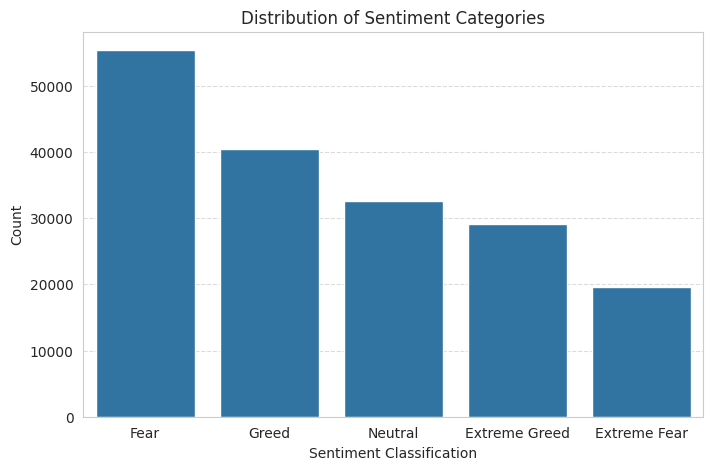

In [66]:
# Count values
print("\nDistribution of sentiment categories")
print(df_merged['classification'].value_counts())

# Bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='classification', data=df_merged, order=df_merged['classification'].value_counts().index)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Classification')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [52]:
print("\nClosed PnL Summary by Sentiment Classification:")
df_merged.groupby('classification')['Closed PnL'].describe()


Closed PnL Summary by Sentiment Classification:


,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,19628.0,44.569798,1161.125492,-29370.11980,0.0,0.0,6.572800,115287.00000
Extreme Greed,29144.0,24.396704,301.239358,-10259.46800,0.0,0.0,7.298795,15993.72491
Fear,55399.0,60.791113,983.874701,-35681.74723,0.0,0.0,6.191990,135329.09010
Greed,40427.0,34.599968,1161.544110,-117990.10410,0.0,0.0,3.598860,74530.52371
Neutral,32634.0,32.807081,541.570043,-24500.00000,0.0,0.0,3.996263,48504.09555


/tmp/ipython-input-3296606187.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


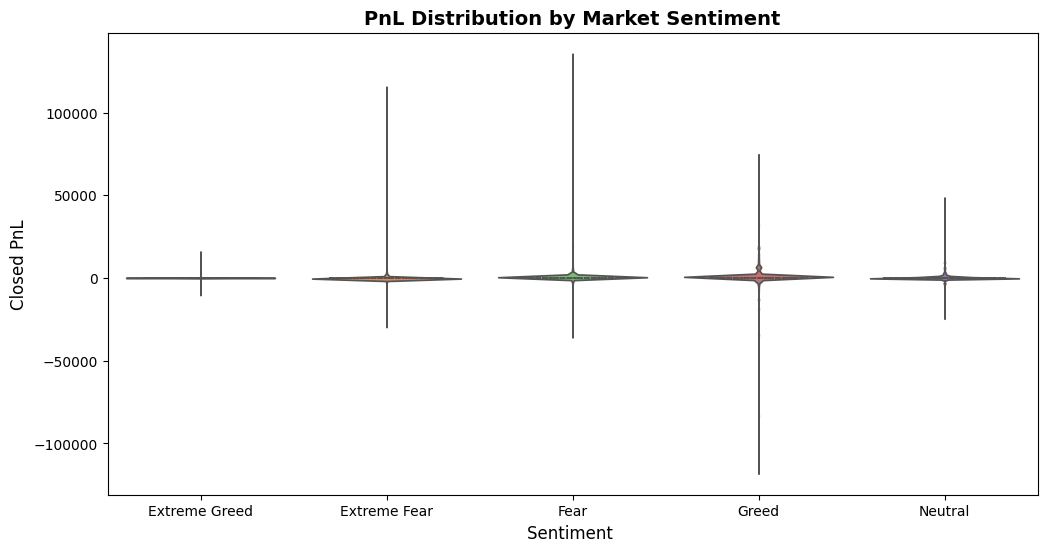

In [53]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    x="classification",
    y="Closed PnL",
    data=df_merged,
    inner="quartile",  # show quartiles inside
    palette="muted"
)
plt.title("PnL Distribution by Market Sentiment", fontsize=14, weight='bold')
plt.xlabel("Sentiment ", fontsize=12)
plt.ylabel("Closed PnL", fontsize=12)
plt.show()

In [54]:
df_merged['Win'] = df_merged['Closed PnL'] > 0
win_rate = df_merged.groupby('classification')['Win'].mean() * 100
print("\nWin Rate (%) by Sentiment Classification:")
print(win_rate)




Win Rate (%) by Sentiment Classification:
classification
Extreme Fear     38.195435
Extreme Greed    43.470354
Fear             42.417733
Greed            37.123704
Neutral          40.368940
Name: Win, dtype: float64


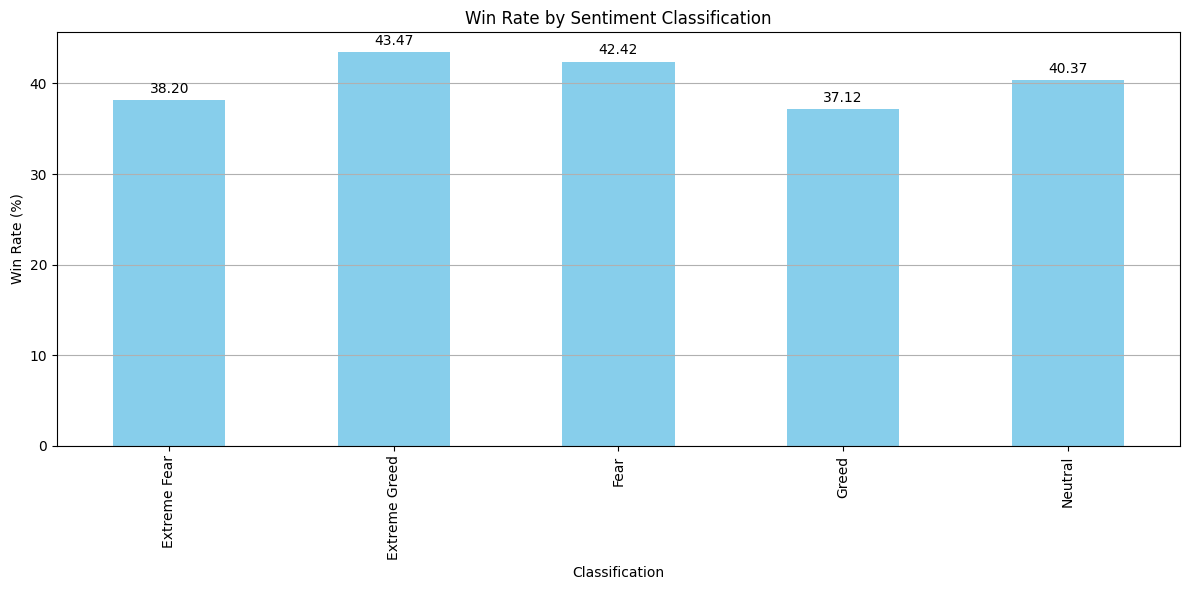

In [55]:
plt.figure(figsize=(12, 6))
ax = win_rate.plot(kind='bar', color='skyblue')

# Titles & labels
plt.title('Win Rate by Sentiment Classification')
plt.ylabel('Win Rate (%)')
plt.xlabel('Classification')
plt.grid(True, axis='y')
plt.tight_layout()

# --- Add labels automatically ---
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', padding=3)

plt.show()

In [56]:
trade_volume = df_merged.groupby('classification')['Size USD'].sum()
print("\nTotal Trade Volume (USD) by Classification:")
print(trade_volume)


Total Trade Volume (USD) by Classification:
classification
Extreme Fear     1.118658e+08
Extreme Greed    1.035586e+08
Fear             4.737017e+08
Greed            2.703142e+08
Neutral          1.719953e+08
Name: Size USD, dtype: float64


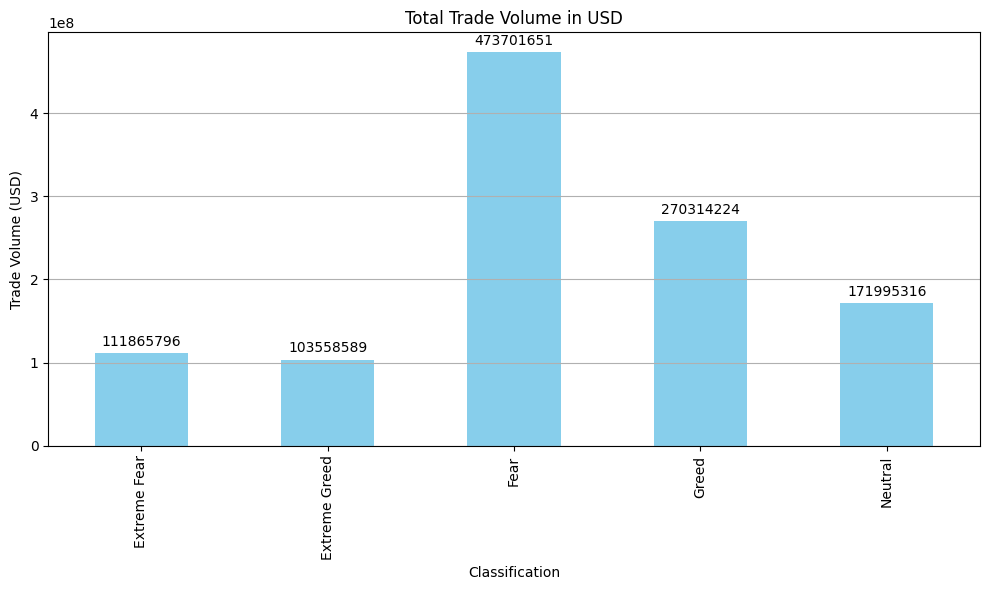

In [57]:
plt.figure(figsize=(10, 6))
ax = trade_volume.plot(kind='bar', color='skyblue')

# Titles & labels
plt.title('Total Trade Volume in USD')
plt.ylabel('Trade Volume (USD)')
plt.xlabel('Classification')
plt.grid(True, axis='y')
plt.tight_layout()

# Add value labels on top of bars
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge', padding=3)

plt.show()


In [58]:
side_distribution = df_merged.groupby(['classification', 'Side']).size().unstack()
print("\nTrade Side Distribution by Sentiment:")
print(side_distribution)


Trade Side Distribution by Sentiment:
Side              BUY   SELL
classification              
Extreme Fear    10172   9456
Extreme Greed   13569  15575
Fear            27222  28177
Greed           20347  20080
Neutral         16139  16495


<Figure size 1200x600 with 0 Axes>

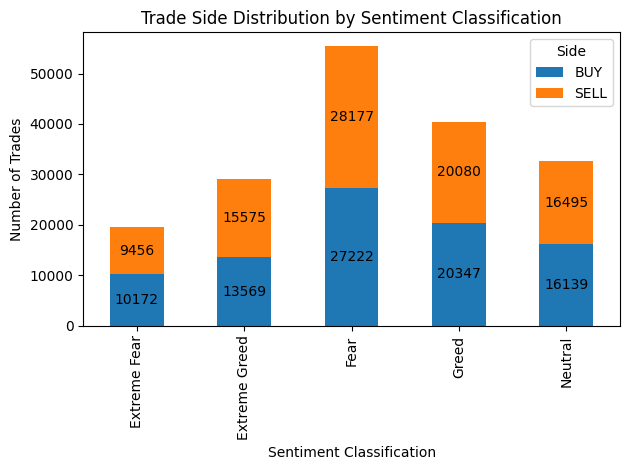

In [59]:
plt.figure(figsize=(12, 6))
ax = side_distribution.plot(kind='bar', stacked=True)

# Titles & labels
plt.title('Trade Side Distribution by Sentiment Classification')
plt.ylabel('Number of Trades')
plt.xlabel('Sentiment Classification')
plt.tight_layout()

# Add numbers to each stacked segment
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center')

plt.show()

In [65]:
sns.set_style("whitegrid")

# -------- auto-detect column names --------
def find_col(df, candidates):
    for c in candidates:
        for col in df.columns:
            if c.lower() == col.lower() or c.lower() in col.lower():
                return col
    return None

pnl_col   = find_col(df_merged, ['closed pnl', 'closedpnl', 'pnl'])
sent_val  = find_col(df_merged, ['value'])
class_col = find_col(df_merged, ['classification', 'class'])
time_col  = find_col(df_merged, ['Timestamp IST', 'timestamp', 'time', 'date_time'])
size_col  = find_col(df_merged, ['size usd', 'size_usd', 'sizeusd'])
acct_col  = find_col(df_merged, ['account', 'acct'])
coin_col  = find_col(df_merged, ['coin', 'symbol'])

print("Detected columns:", pnl_col, sent_val, class_col, time_col, size_col, acct_col, coin_col)

# --------  Summary by sentiment --------
summary = df_merged.groupby(class_col).agg(
    trades_count=(acct_col, 'count'),
    mean_pnl=(pnl_col, 'mean'),
    median_pnl=(pnl_col, 'median'),
    std_pnl=(pnl_col, 'std'),
    win_rate=(pnl_col, lambda x: (x > 0).mean() * 100),
    avg_size=(size_col, 'mean')
).sort_values('trades_count', ascending=False)

print("\n=== Summary by Sentiment ===")
display(summary)


Detected columns: Closed PnL value classification Timestamp IST Size USD Account Coin

=== Summary by Sentiment ===


,trades_count,mean_pnl,median_pnl,std_pnl,win_rate,avg_size
classification,,,,,,
Fear,55399,60.791113,0.0,983.874701,42.417733,8550.725668
Greed,40427,34.599968,0.0,1161.544110,37.123704,6686.477451
Neutral,32634,32.807081,0.0,541.570043,40.368940,5270.433167
Extreme Greed,29144,24.396704,0.0,301.239358,43.470354,3553.341643
Extreme Fear,19628,44.569798,0.0,1161.125492,38.195435,5699.296699


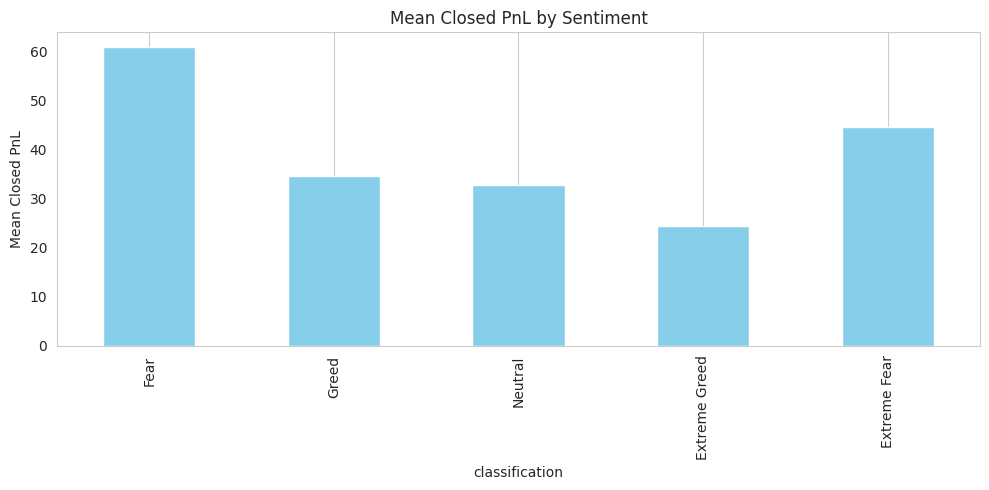

In [61]:
# Bar plot mean PnL
plt.figure(figsize=(10,5))
summary['mean_pnl'].plot(kind='bar', color='skyblue')
plt.title('Mean Closed PnL by Sentiment')
plt.ylabel('Mean Closed PnL')
plt.grid(axis='y')
plt.tight_layout()
plt.show()